In [19]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

데이터 불러오기

In [2]:
file_path = "healthcare-dataset-stroke-data.csv"
stroke_data = pd.read_csv(file_path)
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


데이터 백업

In [3]:
stroke_data_copy_backup = stroke_data.copy()
stroke_data.to_csv('Stroke_backup.csv')

file_path = 'Stroke_backup.csv'
stroke_data_csv_backup = pd.read_csv(file_path)
stroke_data_csv_backup

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


데이터 정보 보기

In [4]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


데이터 재구조화

In [6]:
stroke_data.groupby(['gender']).mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,,
Female,36479.685037,43.757395,0.092184,0.037742,104.057809,29.065758,0.047094
Male,36562.541371,42.483385,0.104965,0.077069,109.088520,28.647936,0.051064
Other,56156.000000,26.000000,0.000000,0.000000,143.330000,22.400000,0.000000


In [7]:
gender_dict = {'Male':0,'Female':1}
stroke_data['gender'] = stroke_data['gender'].map(gender_dict)

In [8]:
stroke_data.groupby(['ever_married']).mean()

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
ever_married,,,,,,,,
No,36117.673307,0.565490,22.014229,0.030165,0.018213,96.44815,25.214721,0.016505
Yes,36727.514465,0.596779,54.342082,0.132717,0.072771,111.23031,30.850749,0.065613


In [9]:
married_dict = {'No':0,'Yes':1}
stroke_data['ever_married'] = stroke_data['ever_married'].map(married_dict) 

In [10]:
stroke_data.groupby(['work_type']).mean()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
work_type,,,,,,,,,
Govt_job,36516.936073,0.607306,50.879756,0.111111,0.054795,0.821918,107.779772,30.522063,0.050228
Never_worked,38274.409091,0.500000,16.181818,0.000000,0.000000,0.000000,96.042727,25.545455,0.000000
Private,36951.227009,0.599863,45.503932,0.096068,0.054017,0.719316,106.796844,30.304625,0.050940
Self-employed,35551.288156,0.615385,60.201465,0.175824,0.098901,0.865690,112.645446,30.211871,0.079365
children,35769.432314,0.474527,6.841339,0.000000,0.001456,0.000000,94.400277,20.038003,0.002911


In [11]:
work_dict = {'children':0,'Never_worked':1,'Govt_job':2,'Private':3,'Self-employed':4}
stroke_data['work_type'] = stroke_data['work_type'].map(work_dict) 

In [12]:
stroke_data.groupby(['Residence_type']).mean()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,stroke
Residence_type,,,,,,,,,,
Rural,36547.998011,0.582969,42.900811,0.099841,0.053302,0.653142,2.620923,106.375235,28.894212,0.045346
Urban,36488.613636,0.588983,43.542126,0.095146,0.054700,0.659091,2.618644,105.927307,28.892289,0.052003


In [13]:
residence_dict = {'Rural':0,'Urban':1}
stroke_data['Residence_type'] = stroke_data['Residence_type'].map(residence_dict)

In [14]:
stroke_data.groupby(['smoking_status']).count()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,,,,,
Unknown,1544,1544,1544,1544,1544,1544,1544,1544,1544,1483,1544
formerly smoked,885,884,885,885,885,885,885,885,885,837,885
never smoked,1892,1892,1892,1892,1892,1892,1892,1892,1892,1852,1892
smokes,789,789,789,789,789,789,789,789,789,737,789


In [22]:
#모든 Unknown을 제거하거나 바꾸면 결과에 이상을 초래할 수 있을 것으로 예상되어 그대로 분석 진행
smoking_dict = {'Unknown':0, 'formerly smoked':1, 'never smoked':2, 'smokes':3}
stroke_data['smoking_status'] = stroke_data['smoking_status'].map(smoking_dict)

In [16]:
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,1,3,1,228.69,36.6,1,1
1,51676,1.0,61.0,0,0,1,4,0,202.21,NaN,2,1
2,31112,0.0,80.0,0,1,1,3,0,105.92,32.5,2,1
3,60182,1.0,49.0,0,0,1,3,1,171.23,34.4,3,1
4,1665,1.0,79.0,1,0,1,4,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,1,3,1,83.75,NaN,2,0
5106,44873,1.0,81.0,0,0,1,4,1,125.20,40.0,2,0
5107,19723,1.0,35.0,0,0,1,4,0,82.99,30.6,2,0
5108,37544,0.0,51.0,0,0,1,3,0,166.29,25.6,1,0


In [20]:
stroke_data.isnull().sum()

id                     0
gender                 1
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

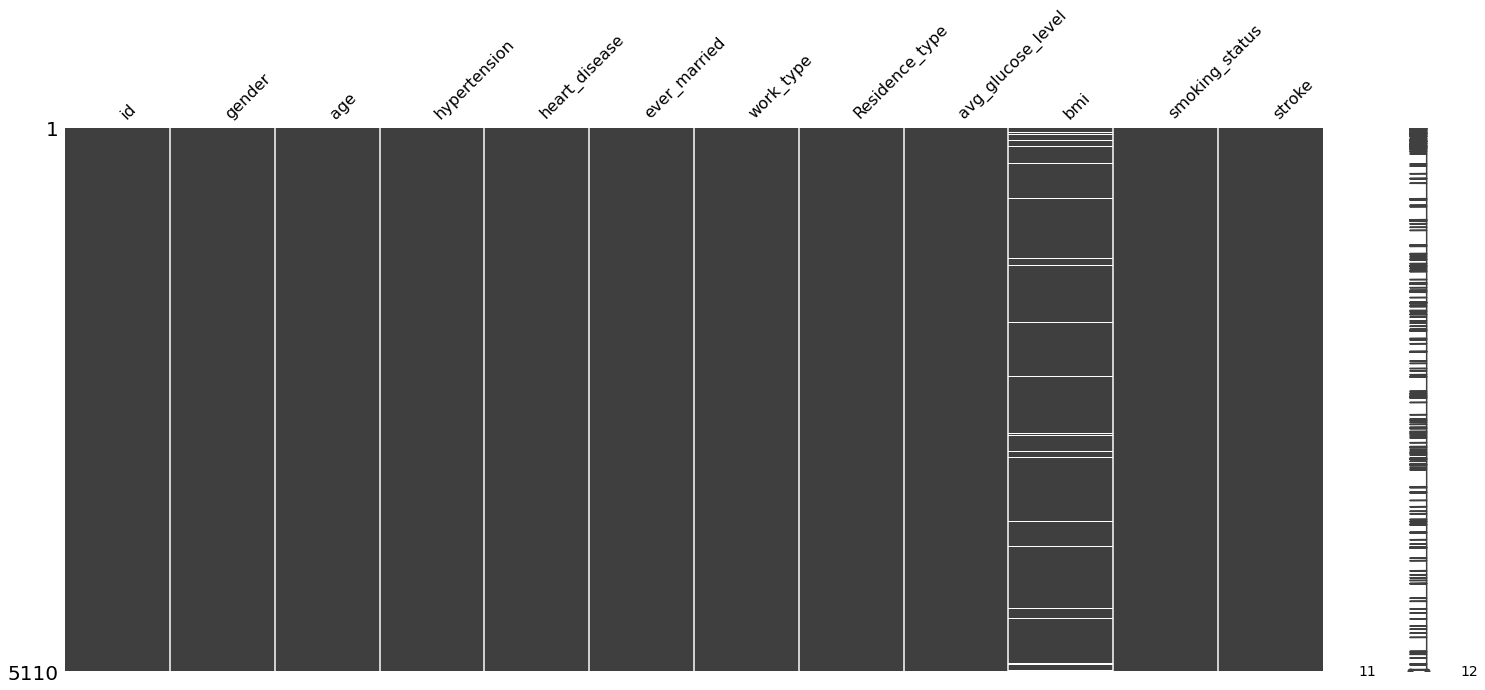

In [21]:
msno.matrix(stroke_data)